<a href="https://colab.research.google.com/github/Pavi1903/Financial-Transactions/blob/main/Financial_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

data=pd.read_csv("Financial_Transactions.csv")
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0,0.0,0,0


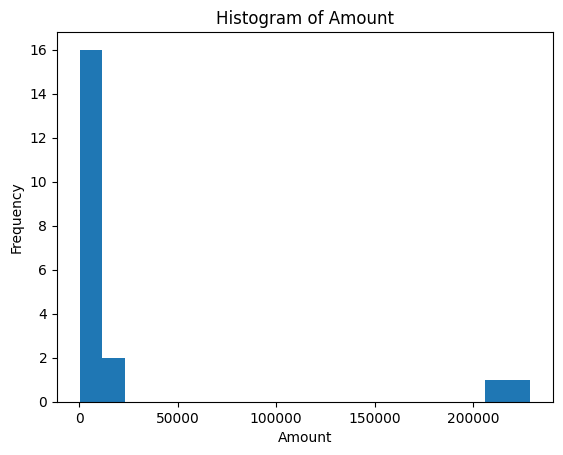

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['amount'],bins=20)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

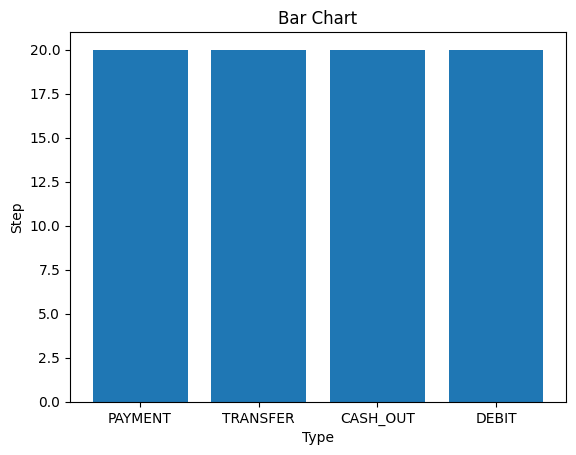

In [ ]:
plt.bar(data['type'].value_counts().index,data['step'].value_counts().values)
plt.xlabel('Type')
plt.ylabel('Step')
plt.title('Bar Chart')
plt.show()

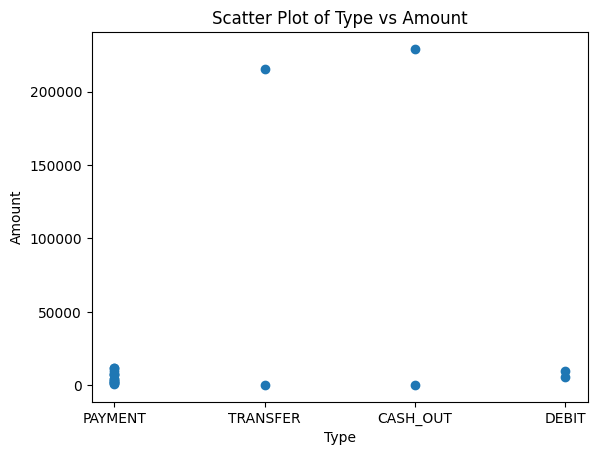

In [ ]:
plt.scatter(data['type'],data['amount'])
plt.xlabel('Type')
plt.ylabel('Amount')
plt.title('Scatter Plot of Type vs Amount')
plt.show()

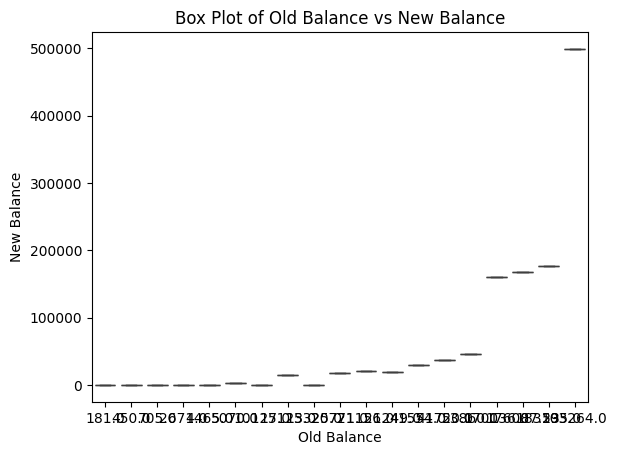

In [ ]:

import seaborn as sns
sns.boxplot(x='oldbalanceOrg',y='newbalanceOrig',data=data)
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.title('Box Plot of Old Balance vs New Balance')
plt.show()

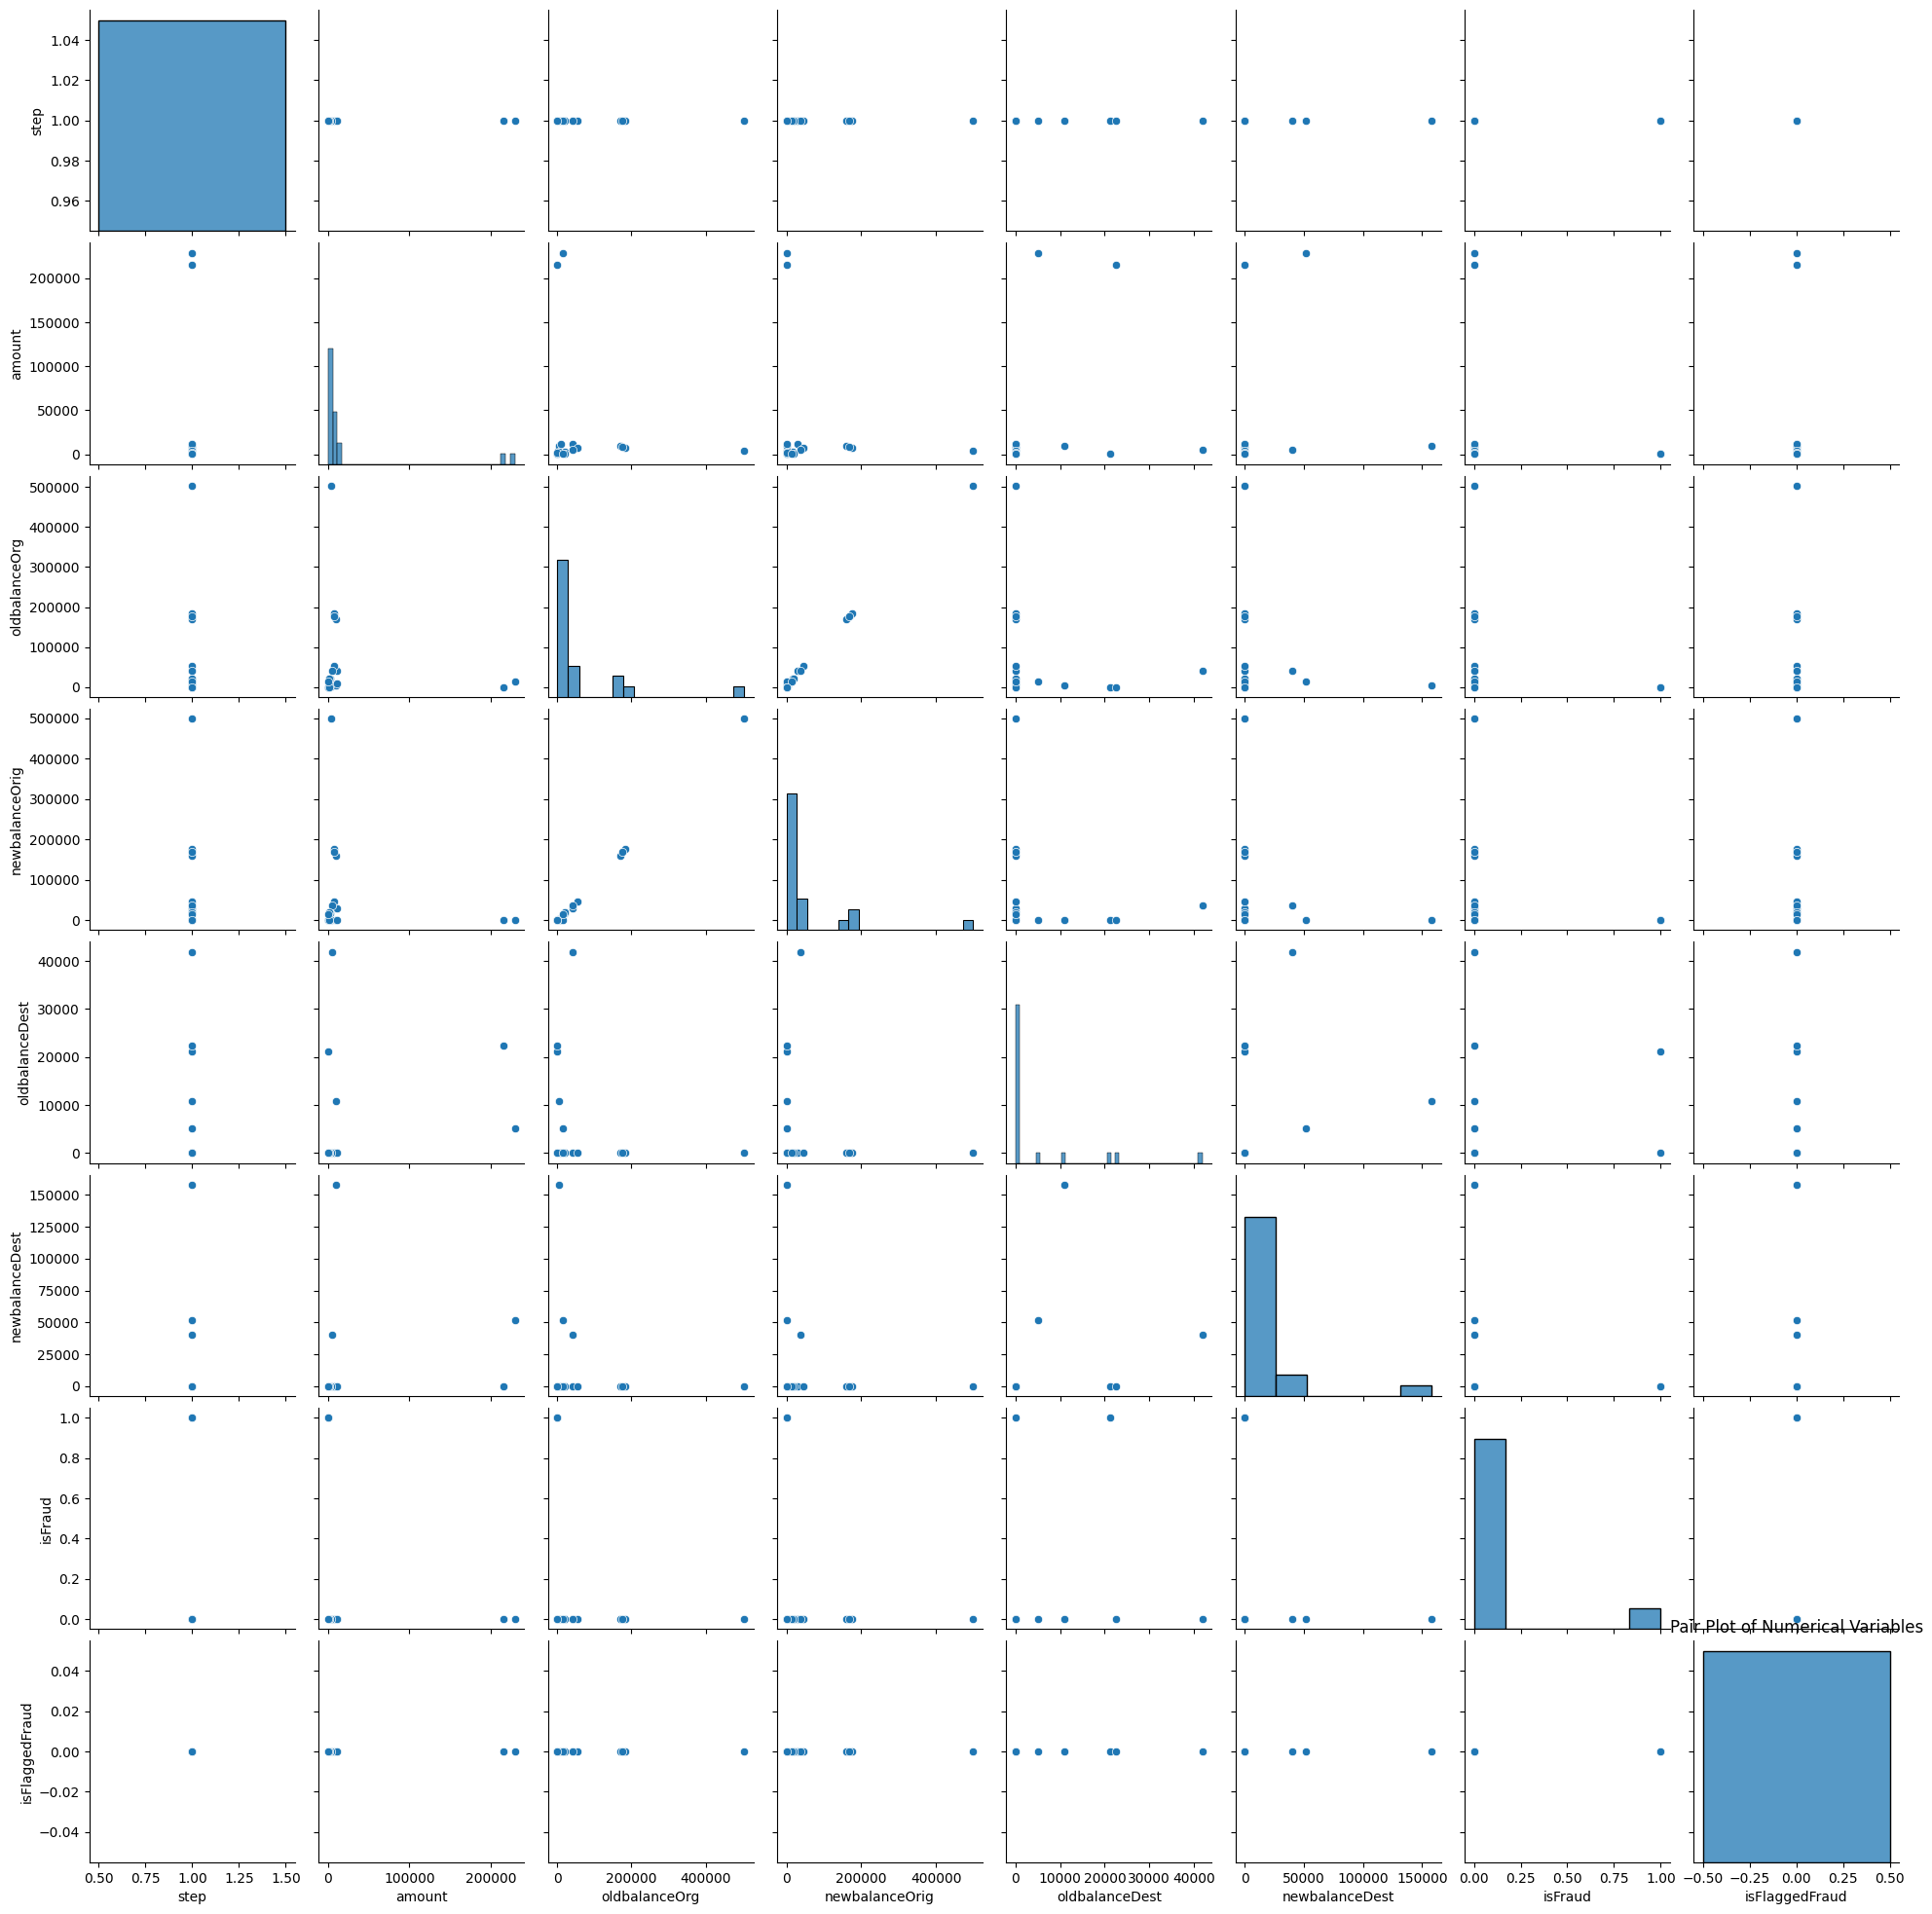

In [ ]:
sns.pairplot(data)
plt.title('Pair Plot of Numerical Variables')
plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter(data,x='type',y='amount',color='type',hover_data=['type'])
fig.update_layout(
    title='Interactive Scatter Plot',
    xaxis_title='Type',
    yaxis_title='Amount',
    hovermode='closest'
)
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sample_df=data.sample(frac=0.4,random_state=42)
sample_df.shape

(8, 11)

In [ ]:
X=sample_df.drop(['isFraud','isFlaggedFraud','nameDest','nameOrig','type'],axis=1)
y=sample_df['isFraud']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
sample_df['isFraud'].value_counts()

isFraud
0    7
1    1
Name: count, dtype: int64

In [ ]:
sc=StandardScaler()
model=sc.fit(X)
X=model.transform(X)
X

array([[ 0.        , -0.29924672,  2.53007057,  2.53287184, -0.4712576 ,
        -0.37796447],
       [ 0.        , -0.41574763, -0.32616502, -0.25703956, -0.4712576 ,
        -0.37796447],
       [ 0.        ,  2.64346617, -0.4379566 , -0.65471416,  0.25835287,
         2.64575131],
       [ 0.        , -0.40626818, -0.32438203, -0.26923777, -0.4712576 ,
        -0.37796447],
       [ 0.        , -0.37728204, -0.68055833, -0.65471416, -0.4712576 ,
        -0.37796447],
       [ 0.        , -0.32637903,  0.3008341 ,  0.26086346, -0.4712576 ,
        -0.37796447],
       [ 0.        , -0.38968644, -0.33354622, -0.30331549, -0.4712576 ,
        -0.37796447],
       [ 0.        , -0.42885613, -0.72829646, -0.65471416,  2.56919275,
        -0.37796447]])

**Logistic Regression**

In [ ]:
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [ ]:
dt=DecisionTreeClassifier()
dt_grid={'max_depth':[10,20,30],'min_samples_split':[2,5,10]}
dt_clf=GridSearchCV(dt,dt_grid,cv=3)
dt_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
rf=RandomForestClassifier()
rf_grid={'n_estimators':[1,3],'max_depth':[10,20],'min_samples_leaf':[1,2]}
rf_clf=GridSearchCV(rf,rf_grid,cv=3)
rf_clf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'n_estimators': [1, 3]})

**Model Evaluation**

In [ ]:
def evaluate_model(model,X_test,y_test):
  y_pred=model.predict(X_test)
  y_pred_proba=model.predict_proba(X_test)[:,1]


  print("Confusion Matrix")
  print(confusion_matrix(y_test,y_pred))

  print("Classification Report")
  print(classification_report(y_test,y_pred))

  print("Accuracy Score")
  print(accuracy_score(y_test,y_pred))

  print("F1 Score")
  print(f1_score(y_test,y_pred))

  #calculate auc and print AUC Score
  auc=roc_auc_score(y_test,y_pred_proba)
  print("AUC Score:",auc)

**Evaluating each model**

Logistic Regression Results:
Confusion Matrix
[[1 0]
 [2 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Accuracy Score
0.3333333333333333
F1 Score
0.0
AUC Score: 0.5


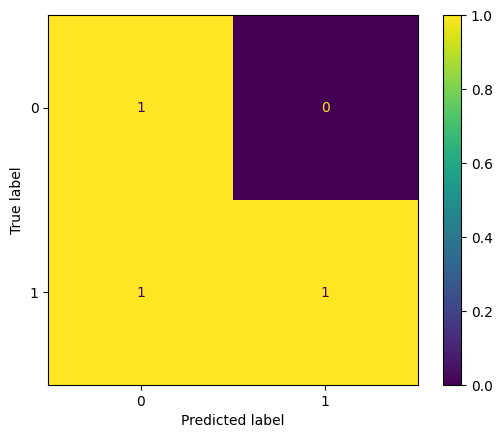

In [ ]:
#for Logistic Regression

print("Logistic Regression Results:")
y_test=pd.Series([1,0,1])
evaluate_model(log_reg, X_test, y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

Decision Tree Results:
Confusion Matrix
[[1 0]
 [2 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Accuracy Score
0.3333333333333333
F1 Score
0.0
AUC Score: 0.5


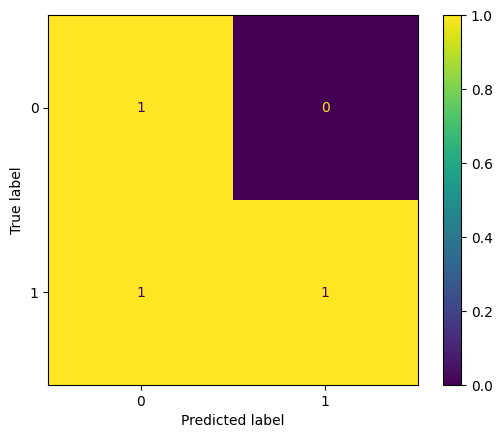

In [ ]:
#For Decision Tree

print("Decision Tree Results:")
evaluate_model(dt_clf,X_test,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

Random Forest Results:
Confusion Matrix
[[2 0]
 [1 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Accuracy Score
0.6666666666666666
F1 Score
0.0
AUC Score: 0.5


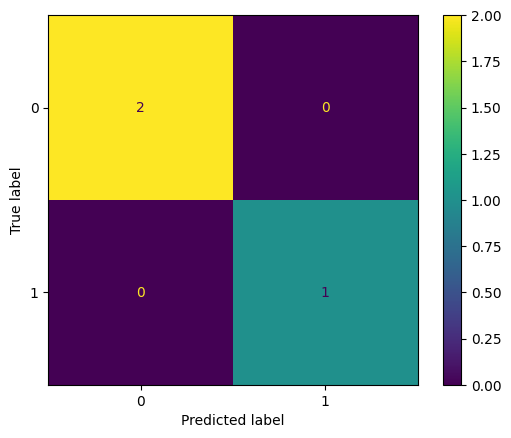

In [ ]:
#For Random Forest
y_test=pd.Series([0,0,1])
print("Random Forest Results:")
evaluate_model(rf_clf,X_test,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()